In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, accuracy_score, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('final_prj.xlsx')

In [3]:
df

,age,gender,edu_lvl,marital_status,occupation,income_lvl,live_area,diagnosis,Family_History,Substance_use,Suicide_Attempt,Social_Support,Stress_Factors
0,72,male,University,Divorced,Unemployed,High,city,0,0,No,No,Low,High
1,49,male,Postgraduate,Divorced,Retired,Medium,village,1,1,Yes,Yes,High,High
2,53,male,Postgraduate,Widowed,Retired,Medium,village,1,1,No,No,Low,Medium
3,67,male,High_School,Divorced,Unemployed,High,village,0,0,Yes,No,Medium,Medium
4,54,female,Primary,Divorced,Unemployed,High,city,0,0,No,No,Low,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,72,female,Middle_School,Widowed,Student,Low,city,1,1,No,Yes,Medium,Medium
9996,27,female,High_School,Widowed,Student,Low,village,1,0,No,No,High,High
9997,31,male,High_School,Divorced,Unemployed,Low,village,1,1,Yes,No,Medium,Medium
9998,56,male,University,Married,Employed,High,city,0,0,No,No,Low,Medium


In [4]:
# Age – Patient's age (between 18 and 80)
# Gender – 0: Female, 1: Male
# Education_Level – 1: Primary, 2: Middle School, 3: High School, 4: University, 5: Postgraduate
# Marital_Status – 0: Single, 1: Married, 2: Divorced, 3: Widowed
# Occupation – 0: Unemployed, 1: Employed, 2: Retired, 3: Student
# Income_Level – 0: Low, 1: Medium, 2: High
# Living_Area – 0: Rural, 1: Urban
# Diagnosis – 0: Not schizophrenic, 1: Schizophrenic
# Family_History – 0: No, 1: Yes (Genetic predisposition)
# Substance_Use – 0: No, 1: Yes (Tobacco, alcohol, or other substances)
# Suicide_Attempt – 0: No, 1: Yes
# Social_Support – 0: Low, 1: Medium, 2: High
# Stress_Factors – 0: Low, 1: Medium, 2: High

In [5]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [17]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [19]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

roc_log_reg = cross_val_score(log_reg, X_train, y_train,cv=5, scoring='roc_auc').mean()
recall_log_reg = cross_val_score(log_reg, X_train, y_train,cv=5, scoring='recall').mean()
precision_log_reg = cross_val_score(log_reg, X_train, y_train,cv=5, scoring='precision').mean()
f1_log_reg = cross_val_score(log_reg, X_train, y_train,cv=5, scoring='f1').mean()

print('Roc', roc_log_reg)
print('recall', recall_log_reg)
print('precision', precision_log_reg)
print('f1', f1_log_reg)

Roc 0.8251614385050111
recall 0.4739141277692339
precision 0.8717268731509173
f1 0.6137236870493024


In [20]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

roc_tree = cross_val_score(tree, X_train, y_train,cv=5, scoring='roc_auc').mean()
recall_tree = cross_val_score(tree, X_train, y_train,cv=5, scoring='recall').mean()
precision_tree = cross_val_score(tree, X_train, y_train,cv=5, scoring='precision').mean()
f1_tree = cross_val_score(tree, X_train, y_train,cv=5, scoring='f1').mean()

print('Roc', roc_tree)
print('recall', recall_tree)
print('precision', precision_tree)
print('f1', f1_tree)

Roc 0.6771372859968281
recall 0.5594846003574545
precision 0.525819791322166
f1 0.5419390715332465


In [21]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

roc_rf = cross_val_score(rf, X_train, y_train,cv=5, scoring='roc_auc').mean()
recall_rf = cross_val_score(rf, X_train, y_train,cv=5, scoring='recall').mean()
precision_rf = cross_val_score(rf, X_train, y_train,cv=5, scoring='precision').mean()
f1_rf = cross_val_score(rf, X_train, y_train,cv=5, scoring='f1').mean()

print('Roc', roc_rf)
print('recall', recall_rf)
print('precision', precision_rf)
print('f1', f1_rf)

Roc 0.7999231285956256
recall 0.4869495822769026
precision 0.784685599211379
f1 0.6005659107100912


In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

roc_knn = cross_val_score(knn, X_train, y_train,cv=5, scoring='roc_auc').mean()
recall_knn = cross_val_score(knn, X_train, y_train,cv=5, scoring='recall').mean()
precision_knn = cross_val_score(knn, X_train, y_train,cv=5, scoring='precision').mean()
f1_knn = cross_val_score(knn, X_train, y_train,cv=5, scoring='f1').mean()

print('Roc', roc_knn)
print('recall', recall_knn)
print('precision', precision_knn)
print('f1', f1_knn)

Roc 0.6689534460055382
recall 0.24653892514235837
precision 0.6317589640378533
f1 0.35448126524002105


In [23]:
cat = CatBoostClassifier(random_state=42,verbose=False)
cat.fit(X_train, y_train)

roc_cat = cross_val_score(cat, X_train, y_train,cv=5, scoring='roc_auc').mean()
recall_cat = cross_val_score(cat, X_train, y_train,cv=5, scoring='recall').mean()
precision_cat = cross_val_score(cat, X_train, y_train,cv=5, scoring='precision').mean()
f1_cat = cross_val_score(cat, X_train, y_train,cv=5, scoring='f1').mean()

print('Roc', roc_cat)
print('recall', recall_cat)
print('precision', precision_cat)
print('f1', f1_cat)

Roc 0.8125698841138516
recall 0.4975476952491792
precision 0.7930897558677042
f1 0.6110318465592517


In [24]:
df_results = pd.DataFrame({
    "Model": ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'CatBoostClassifier'],
    "ROC-AUC": [roc_log_reg, roc_tree, roc_rf, roc_knn, roc_cat],
    "Recall": [recall_log_reg, recall_tree, recall_rf, recall_knn, recall_cat],
    "Precision": [precision_log_reg, precision_tree, precision_rf, precision_knn, precision_cat],
    "F1 Score": [f1_log_reg, f1_tree, f1_rf, f1_knn, f1_cat]
})

In [25]:
df_results

,Model,ROC-AUC,Recall,Precision,F1 Score
0,LogisticRegression,0.825161,0.473914,0.871727,0.613724
1,DecisionTreeClassifier,0.677137,0.559485,0.525820,0.541939
2,RandomForestClassifier,0.799923,0.486950,0.784686,0.600566
3,KNeighborsClassifier,0.668953,0.246539,0.631759,0.354481
4,CatBoostClassifier,0.812570,0.497548,0.793090,0.611032


## Тут мы видем что лучшая модель LogisticRegression

In [31]:
model = LogisticRegression(random_state=42)

param_grid = {
    'C': [0.01, 0.03, 0.05, 0.07, 0.1],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter':[50, 70, 100, 120]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность:", grid_search.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Лучшие параметры: {'C': 0.03, 'max_iter': 120, 'penalty': 'l2', 'solver': 'saga'}
Лучшая точность: 0.8254450646946916


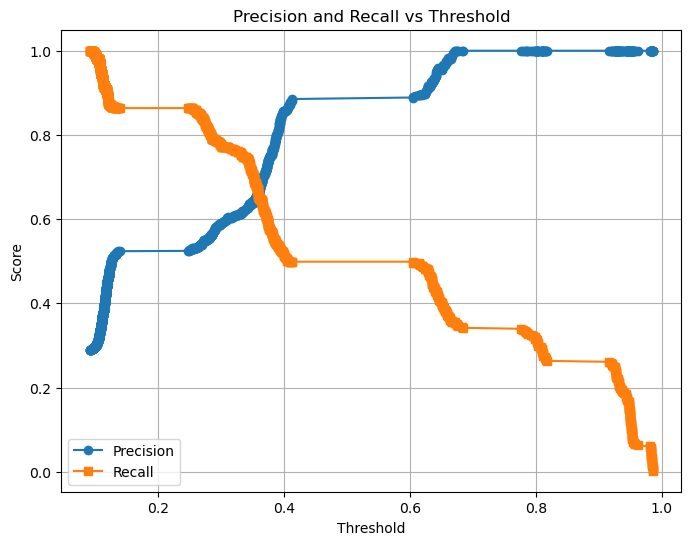

In [51]:
best_model.fit(X_train, y_train)

# Получаем вероятности принадлежности к положительному классу (класс "1")
y_scores_best = best_model.predict_proba(X_test)[:, 1]

# Рассчитываем precision, recall и thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_best)

# Визуализируем зависимость precision и recall от threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision", marker="o")
plt.plot(thresholds, recall[:-1], label="Recall", marker="s")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision and Recall vs Threshfold")
plt.grid()
plt.show()

In [46]:
y_pred_best = (y_scores_best >= 0.35).astype(int)

In [47]:
best_recall_score = recall_score(y_test, y_pred_best)
best_precision_score = precision_score(y_test, y_pred_best)
best_f1_score = f1_score(y_test, y_pred_best)
best_roc_auc = cross_val_score(best_model, X_train, y_train,cv=5, scoring='roc_auc').mean()

In [48]:
df_best = pd.DataFrame({
    "Model": ['LogisticRegression_BEST'],
    "ROC-AUC": [best_roc_auc],
    "Recall": [best_recall_score],
    "Precision": [best_precision_score],
    "F1 Score": [best_f1_score]
})

In [49]:
df_best

,Model,ROC-AUC,Recall,Precision,F1 Score
0,LogisticRegression_BEST,0.825445,0.706697,0.641509,0.672527
